In [1]:
import sys, os, imp
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import lambda2nu, nu2lambda, c

C:\Users\alves\AppData\Local\Temp\ipykernel_22112\3778166921.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import sys, os, imp


In [2]:
# lumapiFile = "/opt/lumerical/v221/api/python/lumapi.py"
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
lumapi = imp.load_source("lumapi", lumapiFile)
varApi = lumapi.MODE(hide = False)

##  Specification of the materials and dimensions of the guide

In [3]:
# units
um = 1e-6
nm = 1e-9

In [4]:
# Materials 
sub_material = 'SiO2 (Glass) - Palik'
core_material = 'Si (Silicon) - Palik'

In [5]:
# MMI x parameters
# L = 57.42 * um
L = 59.2*um # otimizado
W = 7.0 * um

# Taper parameters
W1 = 450 * nm
W2 = 1.5 * um
L1 = 15 * um

# Waveguide parameters
wvg_width = 450 * nm
wvg_height = 220 * nm

# Waveguide length
wvg_length = 4.0 * um

# Bandwidth operation
cband = True
filename = "S_MMI_varFDTD_TM_2x2_%d_um" % (L / um)

# C Band simulation: 1520 - 1575 nm
# L Band simulation: 1555 - 1635 nm


if cband:
    wvlngth_start = 1.520 * um
    wvlngth_stop = 1.575 * um
else:
    wvlngth_start = 1.555 * um
    wvlngth_stop = 1.635 * um

nmbrFrqPnts = 20

timeSimulation = (2*wvg_length + 2*L1 + 6*L)/2e8
timeSimulation

1.966e-12

## Structure creation

In [6]:
# Defining a Structure Group
varApi.addstructuregroup()
dev_layer = "GDS_LAYER 35:4"
varApi.set("name", dev_layer)

In [7]:
varApi.switchtolayout()
varApi.deleteall()

# Add box
varApi.addrect()
varApi.addtogroup(dev_layer)
varApi.set("name", "box")
varApi.set("x", 0)
varApi.set("x span", L)
varApi.set("y", 0)
varApi.set("y span", W)
varApi.set("z", 0)
varApi.set("z span", wvg_height)
varApi.set("material", core_material)

# Tapers Configuration
for i in range(4):
    varApi.addobject("linear_taper")
    varApi.set("name", f"taper port {str(i + 1)}")
    varApi.set("thickness", wvg_height)
    varApi.set("angle_side", 90)
    varApi.set("width_r", W1)
    varApi.set("width_l", W2)
    varApi.set("len", L1)
    varApi.set("material", core_material)
    varApi.set("x", varApi.getnamed(f"{dev_layer}::box", "x max") + L1/2)
    varApi.set("y", 0)
    varApi.set("z", 0)

# Adjusting taper positions
varApi.select(f"{dev_layer}::taper port 1")
varApi.set("width_r", W2)
varApi.set("width_l", W1)
varApi.set("x", -varApi.getnamed(f"{dev_layer}::box", "x max") - L1/2)
varApi.set("y", W/6)

varApi.select(f"{dev_layer}::taper port 2")
varApi.set("width_r", W2)
varApi.set("width_l", W1)
varApi.set("x", -varApi.getnamed(f"{dev_layer}::box", "x max") - L1/2)
varApi.set("y", -W/6)

varApi.select(f"{dev_layer}::taper port 3")
varApi.set("y", W/6)

varApi.select(f"{dev_layer}::taper port 4")
varApi.set("y", -W/6)

# add waveguides
for i in range(4):
    varApi.addrect()
    varApi.addtogroup(dev_layer)
    varApi.set("name", f"wvguide {str(i+1)}")
    varApi.set("x", 0)
    varApi.set("x span", wvg_length)
    varApi.set("y", 0)
    varApi.set("y span", wvg_width)
    varApi.set("z", 0)
    varApi.set("z span", wvg_height)
    varApi.set("material", core_material)

# Adjusting the wvg positions
varApi.select(f"{dev_layer}::wvguide 1")
varApi.set("x", varApi.getnamed(f"{dev_layer}::box", "x min") - L1 - wvg_length/2)
varApi.set("y", W/6)

varApi.select(f"{dev_layer}::wvguide 2")
varApi.set("x", varApi.getnamed(f"{dev_layer}::box", "x min") - L1 - wvg_length/2)
varApi.set("y", -W/6)

varApi.select(f"{dev_layer}::wvguide 3")
varApi.set("x", varApi.getnamed(f"{dev_layer}::box", "x max") + L1 + wvg_length/2)
varApi.set("y", W/6)

varApi.select(f"{dev_layer}::wvguide 4")
varApi.set("x", varApi.getnamed(f"{dev_layer}::box", "x max") + L1 + wvg_length/2)
varApi.set("y", -W/6)

## Add solver

In [8]:

xspan_solver = L + 34*um
yspan_solver = W + 16*um
zspan_solver = 3.5*um
number_points = 20

# test_points = np.array([[-L/2.01, W/2 + 0.5*um],
#                         [L/2, -(W/6)],
#                         [L/2, W/6],
#                         [-L/2.01, -(W/2 + 0.5*um)]])

ponto1 = L/2.4
ponto2 = 8*um

test_points = np.array([
    [1.14*ponto1, 0.3*ponto2],
    [1.14*ponto1, -0.3*ponto2],
    [-ponto1, ponto2],
    [-ponto1, -ponto2]
])

In [9]:
varApi.switchtolayout()
varApi.select('varFDTD')
varApi.delete()

varApi.addvarfdtd()
varApi.set('x', 0)
varApi.set('y', 0)
varApi.set('z', 0)
varApi.set("x span",xspan_solver)
varApi.set("y span",yspan_solver)
varApi.set("z span",zspan_solver)
varApi.set('x0', -ponto1)
varApi.set('y0', 0)
varApi.set('background material', sub_material)
varApi.set('global monitor frequency points', number_points)
varApi.set('test points', test_points)
varApi.set('mesh accuracy', 3)
varApi.set('simulation time', timeSimulation)
varApi.set('bandwidth', 2)

varApi.set('z min bc', 'Anti-Symmetric' )
varApi.set('z max bc', 'PML' )

## Add Source


In [10]:
varApi.switchtolayout()
varApi.select('source_input')
varApi.delete()

varApi.addmodesource()
varApi.set('name', 'source_input')
varApi.set('injection axis', 'x')
varApi.set('x', -(L/2 + L1 + wvg_length-2.5*um))
varApi.set('y', W/6)
varApi.set("y span", wvg_width*4)
# varApi.set('z span', zspan_solver-2*wvg_height)
varApi.set('wavelength start', wvlngth_start)
varApi.set('wavelength stop', wvlngth_stop)
varApi.set('direction', 'forward')


## Add monitors

In [11]:
varApi.switchtolayout()
for i in range(5):
    varApi.select('monitor_' + str(i))
    varApi.delete()

varApi.select('movie')
varApi.delete()


varApi.addprofile()
varApi.set('name', 'monitor_0')
varApi.set('x', 0)
varApi.set('y', 0)
varApi.set("x span", xspan_solver)
varApi.set("y span", yspan_solver)

# varApi.addmovie()
# varApi.set('name', 'movie')
# varApi.set('x', 0)
# varApi.set('y', 0)
# varApi.set("x span", xspan_solver)
# varApi.set("y span", yspan_solver)


for j in range(4):

    varApi.addpower()
    varApi.set('name', 'monitor_' + str(j + 1))
    varApi.set('monitor type', 5)
    varApi.set('x', -(L/2 + L1 + wvg_length - 2.7*um))
    varApi.set('y', (W/6) * (-1)**j)
    varApi.set('y span', wvg_width*4)
    varApi.set('z span', zspan_solver-2*wvg_height)

varApi.select('monitor_3')
varApi.set('x', (L/2 + L1 + wvg_length - 2.7*um))

varApi.select('monitor_4')
varApi.set('x', (L/2 + L1 + wvg_length - 2.7*um))

## Simulation

In [12]:
varApi.save(f"C:/Users/alves/Documents/{filename}")

varApi.run()

## Field Profile

In [13]:
Ex = varApi.getresult("monitor_0", "Ex")
Ey = varApi.getresult("monitor_0", "Ey")

x = varApi.getresult("monitor_0", "x")
y = varApi.getresult("monitor_0", "y")

x = x[:,0]/um
y = y[:,0]/um

Emag = np.sqrt(np.abs(Ex**2) + np.abs(Ey**2))

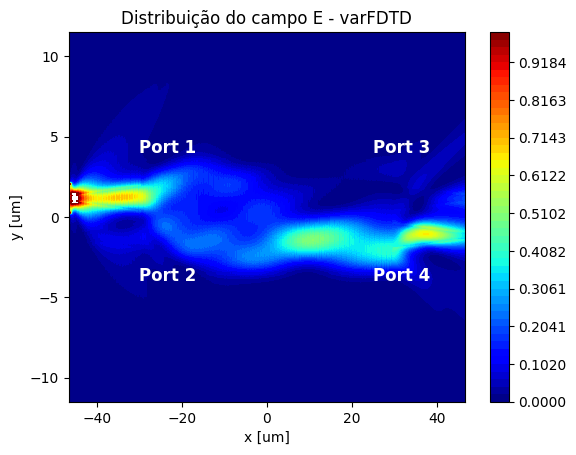

In [29]:
plt.figure()
mycmap = plt.get_cmap('jet')

v = np.linspace(0, 1, 50, endpoint=True)
plt.contourf(x, y, np.transpose(Emag[:,:, 0, 10]**2), v, cmap=mycmap)
plt.colorbar()

plt.title('Distribuição do campo E - varFDTD', fontsize=12)
plt.ylabel('y [um]', fontsize=10)
plt.xlabel('x [um]', fontsize=10)

plt.text(-30, 4, 'Port 1', fontsize=12, fontweight='bold', color='w')
plt.text(-30, -4, 'Port 2', fontsize=12, fontweight='bold', color='w')
plt.text(25, -4, 'Port 4', fontsize=12, fontweight='bold', color='w')
plt.text(25, 4, 'Port 3', fontsize=12, fontweight='bold', color='w')

plt.savefig('Campo_E_var_TM')


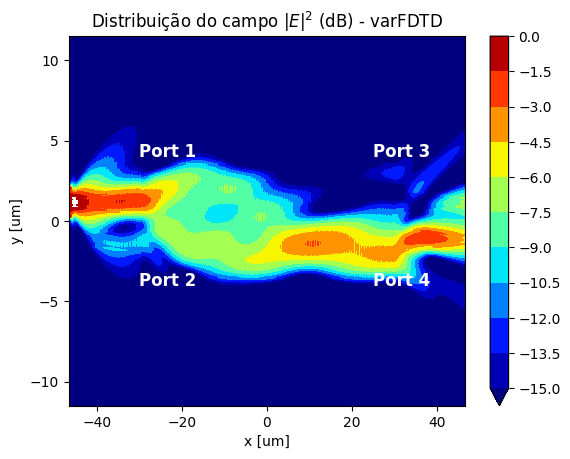

In [34]:
plt.figure()
v = np.linspace(-15, 0, 11, endpoint=True)

plt.title("Distribuição do campo $|E|^2$ (dB) - varFDTD", fontsize=12)
plt.ylabel("y [um]", fontsize=10)
plt.xlabel("x [um]", fontsize=10)

CS = plt.contourf(x, y, 10*np.log10(np.transpose(Emag[:,:,0,10]**2)), v, cmap=mycmap, extend='min')
plt.colorbar(ticks=v)

plt.text(-30, 4, 'Port 1', fontsize=12, fontweight='bold', color='w')
plt.text(-30, -4, 'Port 2', fontsize=12, fontweight='bold', color='w')
plt.text(25, -4, 'Port 4', fontsize=12, fontweight='bold', color='w')
plt.text(25, 4, 'Port 3', fontsize=12, fontweight='bold', color='w')

plt.savefig('Campo_E_log_var_TM')

## Trasmission

In [35]:
T  = varApi.getresult('monitor_3', 'T')
Lambda = T['lambda']
T3  = np.abs(T['T'])

T  = varApi.getresult('monitor_4', 'T')
T4 = np.abs(T['T'])

T3_dB = 10*np.log10(T3)
T4_dB = 10*np.log10(T4)

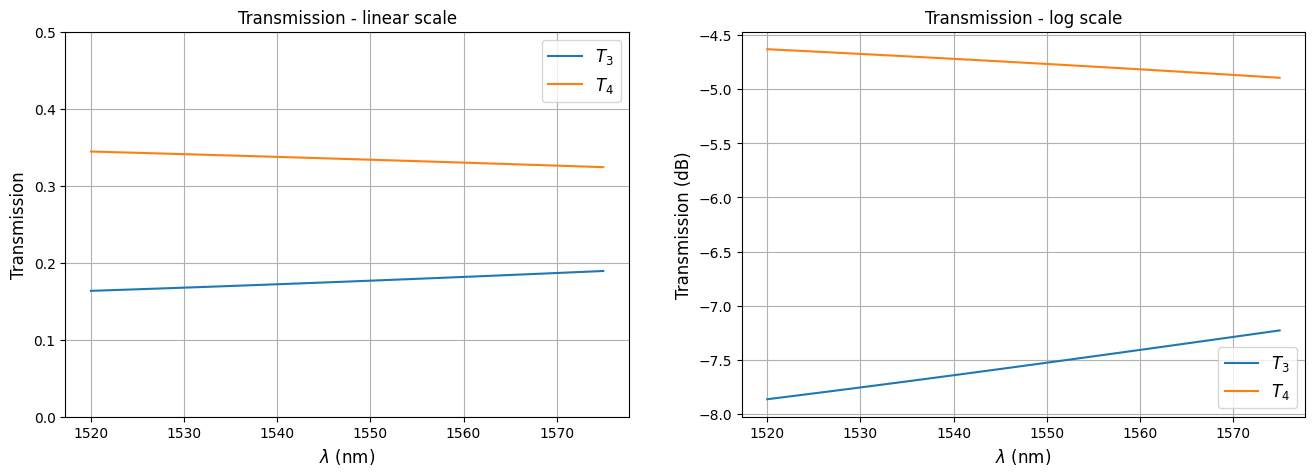

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(Lambda/nm, T3, lw=1.5, label='$T_3$')
axs[0].plot(Lambda/nm, T4, lw=1.5, label='$T_4$')
axs[0].set_xlabel('$\lambda$ (nm)', fontsize=12)
axs[0].set_ylabel('Transmission', fontsize=12)
axs[0].set_title('Transmission - linear scale')
axs[0].legend(fontsize=12)
axs[0].set_ylim([0,0.5])
axs[0].grid()

axs[1].plot(Lambda/nm, T3_dB, lw=1.5, label='$T_3$')
axs[1].plot(Lambda/nm, T4_dB, lw=1.5, label='$T_4$')
axs[1].set_xlabel('$\lambda$ (nm)', fontsize=12)
axs[1].set_ylabel('Transmission (dB)', fontsize=12)
axs[1].set_title('Transmission - log scale')
# axs[1].set_ylim([-4,0])
axs[1].legend(fontsize=12)
axs[1].grid()

plt.savefig('Transmission_TM')

C:\Users\alves\AppData\Local\Temp\ipykernel_22112\724881650.py:14: UserWarning: Using the axes or figure transform requires a bounding box in the respective coordinates. Using bbox_to_anchor=(0, 0, 1, 1) now.
  axins = inset_axes(axs, width="30%", height="30%", loc="upper right", bbox_transform=axs.transAxes)


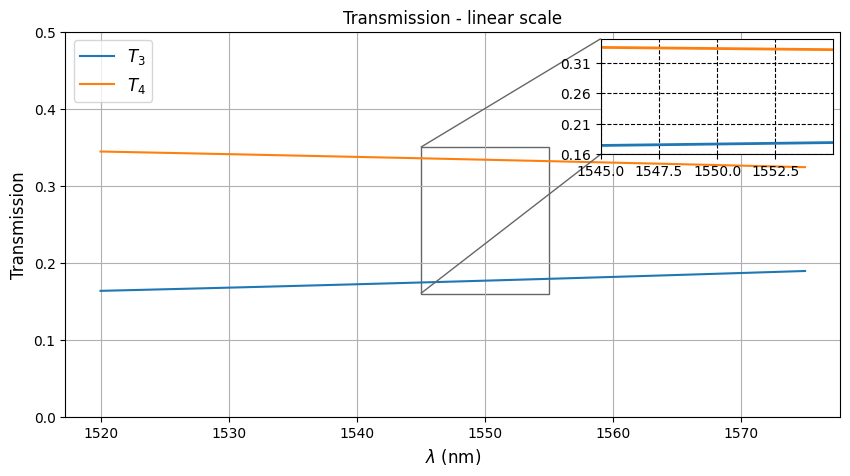

In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(Lambda/nm, T3, lw=1.5, label='$T_3$')
axs.plot(Lambda/nm, T4, lw=1.5, label='$T_4$')
axs.set_xlabel('$\lambda$ (nm)', fontsize=12)
axs.set_ylabel('Transmission', fontsize=12)
axs.set_title('Transmission - linear scale')
axs.legend(loc='upper left', fontsize=12)
axs.set_ylim([0,0.5])
axs.grid()

axins = inset_axes(axs, width="30%", height="30%", loc="upper right", bbox_transform=axs.transAxes)


axins.plot(Lambda/nm, T3, lw=2, label="$T_3$")
axins.plot(Lambda/nm, T4, lw=2, label="$T_4$")
axins.set_xlim(1545, 1555)  
axins.set_ylim(0.16, 0.35)  
axins.grid(True, color='black', linestyle='--')  
axins.set_yticks(np.arange(0.16, 0.35, step=0.05))
axins.set_xticks(np.arange(1545, 1555, step=2.5)) 

mark_inset(axs, axins, loc1=2, loc2=3, fc="none", ec="0.4")

plt.savefig('Transmission_TM_zoom')

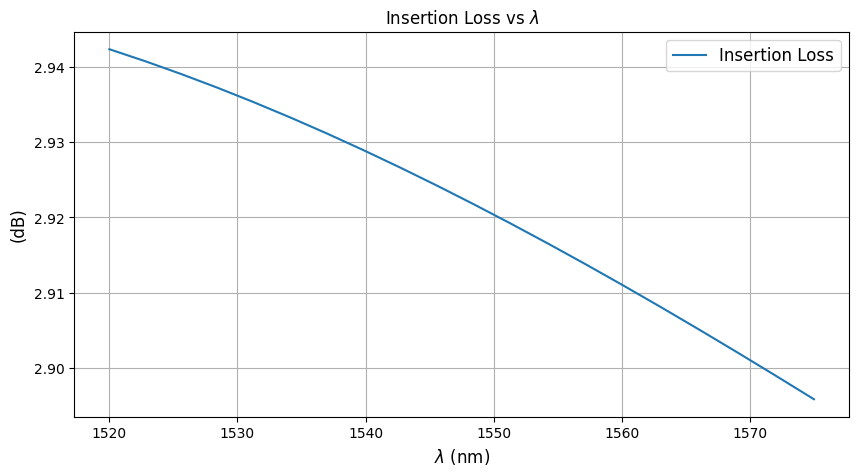

In [47]:
fig, axs = plt.subplots(figsize=(10, 5))

insertion = -10*np.log10(T3+T4)

axs.plot(Lambda/nm, insertion, lw=1.5, label='Insertion Loss')
# axs.plot(Lambda/nm, T4, lw=1.5, label='$T_4$')
axs.set_xlabel('$\lambda$ (nm)', fontsize=12)
axs.set_ylabel('(dB)', fontsize=12)
axs.set_title('Insertion Loss vs $\lambda$')
axs.legend(fontsize=12)
# axs.set_ylim([0,0.5])
axs.grid()

plt.savefig('InsertionLoss_TM')